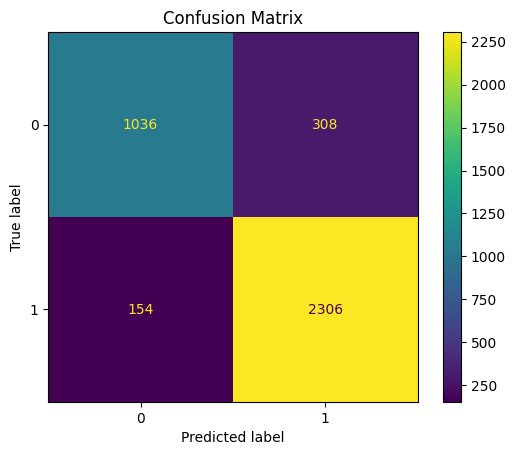

Classification Report:
              precision    recall  f1-score   support

      Hadron       0.87      0.77      0.82      1344
       Gamma       0.88      0.94      0.91      2460

    accuracy                           0.88      3804
   macro avg       0.88      0.85      0.86      3804
weighted avg       0.88      0.88      0.88      3804



In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

#load and preprocess the dataset
df = pd.read_csv("../data/magic04.data", header=None)
columns = ["fLength", "fWidth", "fSize", "fConc", " fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]
df.columns = columns    
df['class'] = df['class'].map({'g': 1, 'h': 0})
x = df.drop('class', axis=1)
y = df['class']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#train the model(or load if already trained)
model = RandomForestClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

#confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.title("Confusion Matrix")
plt.show()

#classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Hadron', 'Gamma']))

In [6]:
import joblib

# Save model
joblib.dump(model, "../models/model.pkl")

print("✅ Model saved as model.pkl")


✅ Model saved as model.pkl


In [9]:
print(model)

RandomForestClassifier()
